# 
Support Vector Machine (SVM) is a relatively simple Supervised Machine Learning Algorithm used for classification and/or regression. It is more preferred for classification but is sometimes very useful for regression as well. Basically, SVM finds a hyper-plane that creates a boundary between the types of data. In 2-dimensional space, this hyper-plane is nothing but a line.

In SVM, we plot each data item in the dataset in an N-dimensional space, where N is the number of features/attributes in the data. Next, find the optimal hyperplane to separate the data. So by this, you must have understood that inherently, SVM can only perform binary classification (i.e., choose between two classes). However, there are various techniques to use for multi-class problems.

To perform SVM on multi-class problems, we can create a binary classifier for each class of the data. The two results of each classifier will be :
The data point belongs to that class OR
The data point does not belong to that class.

# 
SVM works very well without any modifications for linearly separable data. Linearly Separable Data is any data that can be plotted in a graph and can be separated into classes using a straight line.

We use Kernelized SVM for non-linearly separable data. Say, we have some non-linearly separable data in one dimension. We can transform this data into two-dimensions and the data will become linearly separable in two dimensions. This is done by mapping each 1-D data point to a corresponding 2-D ordered pair.

So for any non-linearly separable data in any dimension, we can just map the data to a higher dimension and then make it linearly separable. This is a very powerful and general transformation.

#
A kernel is nothing a measure of similarity between data points. The kernel function in a kernelized SVM tell you, that given two data points in the original feature space, what the similarity is between the points in the newly transformed feature space. There are various kernel functions available, but two of are very popular :

Radial Basis Function Kernel (RBF): The similarity between two points in the transformed feature space is an exponentially decaying function of the distance between the vectors and the original input space as shown below. RBF is the default kernel used in SVM.

Polynomial Kernel: The Polynomial kernel takes an additional parameter, ‘degree’ that controls the model’s complexity and computational cost of the transformation

A very interesting fact is that SVM does not actually have to perform this actual transformation on the data points to the new high dimensional feature space. This is called the kernel trick.

Internally, the kernelized SVM can compute these complex transformations just in terms of similarity calculations between pairs of points in the higher dimensional feature space where the transformed feature representation is implicit.
This similarity function, which is mathematically a kind of complex dot product is actually the kernel of a kernelized SVM. This makes it practical to apply SVM, when the underlying feature space is complex, or even infinite-dimensional. The kernel trick itself is quite complex and is beyond the scope of this article.

# 
Important Parameters in Kernelized SVC ( Support Vector Classifier)

The Kernel : The kernel, is selected based on the type of data and also the type of transformation. By default, the kernel is Radial Basis Function Kernel (RBF).

Gamma : This parameter decides how far the influence of a single training example reaches during transformation, which in turn affects how tightly the decision boundaries end up surrounding points in the input space. If there is a small value of gamma, points farther apart are considered similar. So more points are grouped together and have smoother decision boundaries (may be less accurate). Larger values of gamma cause points to be closer together (may cause overfitting).

The ‘C’ parameter : This parameter controls the amount of regularization applied on the data. Large values of C mean low regularization which in turn causes the training data to fit very well (may cause overfitting). Lower values of C mean higher regularization which causes the model to be more tolerant of errors (may lead to lower accuracy).



# 
Pros of Kernelized SVM:
They perform very well on a range of datasets.
They are versatile : different kernel functions can be specified, or custom kernels can also be defined for specific datatypes.
They work well for both high and low dimensional data.

Cons of Kernelized SVM:
Efficiency (running time and memory usage) decreases as size of training set increases.
Needs careful normalization of input data and parameter tuning.
Does not provide direct probability estimator.
Difficult to interpret why a prediction was made.

use cases
Face Detection
Text and Hypertext categorization
Handwriting recognition
Bioinformatics
Classification of images

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from scipy import stats
import io
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.datasets import make_blobs
from sklearn import svm

# 
sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)

# Circle

In [5]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [6]:
X,Y = make_circles(n_samples=500,noise=0.02)
#sklearn.datasets.make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)[source]

In [8]:
Y

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

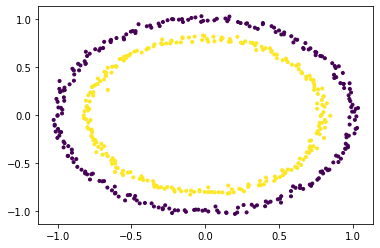

In [14]:
plt.scatter(X[:,0],X[:,1],c=Y, marker = '.')
plt.show()

In [15]:
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
X3 = (X1**2 + X2**2)

In [17]:
X = np.hstack((X, X3))

In [21]:
X
# X[:,0]

array([[-0.75837412, -0.25729991,  0.64133454],
       [ 0.97870178,  0.33322598,  1.06889673],
       [ 0.6852275 ,  0.37815413,  0.61253727],
       ...,
       [-0.87421284, -0.45603154,  0.97221285],
       [ 0.43867425,  0.69700254,  0.67824763],
       [-0.68650058,  0.37205339,  0.60970678]])

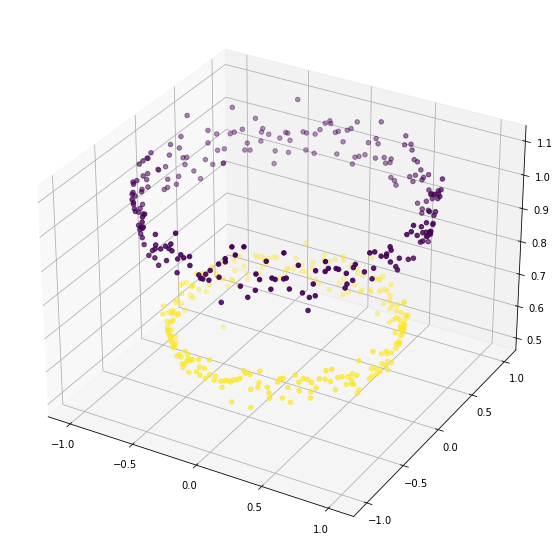

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)

plt.show()

In [27]:
'''fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,X3,c=Y,depthshade=True)
plt.show()'''

"fig = plt.figure(figsize=(10,10))\nax = fig.add_subplot(111,projection='3d')\nax.scatter(X1,X2,X3,c=Y,depthshade=True)\nplt.show()"

In [28]:
# using the rbf kernel function to use the kernel trick
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [31]:
svc.intercept_

array([-1.29297613])

In [32]:
# create support vector classifier using a linear kernel
svc = svm.SVC(kernel = 'linear')
svc.fit(X, Y)

SVC(kernel='linear')

In [33]:
w = svc.coef_
b = svc.intercept_

In [35]:
w,b

(array([[ 0.02766681, -0.02246435, -7.38147862]]), array([6.01410338]))

In [39]:
w[:,0],w[0][0]

(array([0.02766681]), 0.02766680714118286)

In [43]:
x1 = X[:, 0].reshape((-1, 1))
x2 = X[:, 1].reshape((-1, 1))

In [45]:
x1, x2 = np.meshgrid(x1, x2)

In [41]:
x3 = -(w[0][0]*X1 + w[0][1]*X2 + b) / w[0][2]

In [42]:
x3

array([[0.81269648],
       [0.81741011],
       [0.81617339],
       [0.81090293],
       [0.81185623],
       [0.81535471],
       [0.81333525],
       [0.8174365 ],
       [0.81845241],
       [0.81210302],
       [0.81362053],
       [0.81794223],
       [0.81224388],
       [0.81456417],
       [0.8137723 ],
       [0.80998184],
       [0.81135972],
       [0.81085628],
       [0.81455962],
       [0.81100471],
       [0.81959417],
       [0.81086748],
       [0.81826301],
       [0.81848501],
       [0.81841116],
       [0.81877002],
       [0.81615786],
       [0.81156245],
       [0.81348985],
       [0.81147761],
       [0.81217447],
       [0.8189236 ],
       [0.81443788],
       [0.81117503],
       [0.81666506],
       [0.8179937 ],
       [0.81551251],
       [0.81963067],
       [0.81121592],
       [0.81864318],
       [0.81871875],
       [0.81923934],
       [0.81217166],
       [0.81465752],
       [0.81386178],
       [0.813173  ],
       [0.8136683 ],
       [0.814

<ipython-input-57-55792be9cf72>:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes1 = fig.gca(projection = '3d')


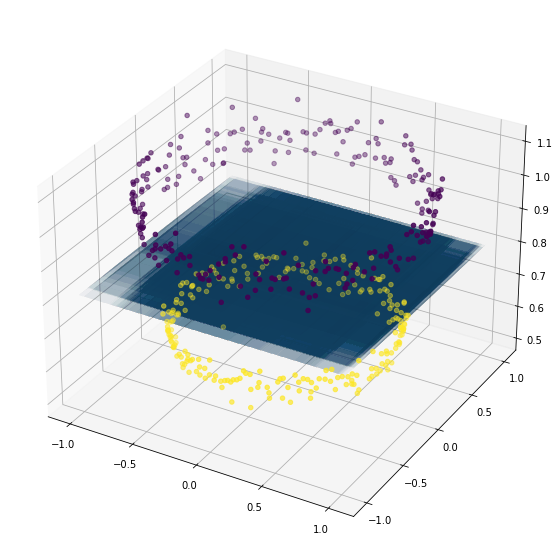

In [57]:
fig = plt.figure(figsize=(10,10))
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(X1, X2, X3, zdir='z', s=20, c = Y, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(x1, x2, x3, alpha = 0.01)
plt.show()

# Random

In [58]:
x = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

In [59]:
clf = SVC(kernel='linear')
clf.fit(x, y)

SVC(kernel='linear')

In [60]:
prediction = clf.predict([[0,6]])
prediction

array([2])